In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d

In [8]:
def Rosenbrock(x,y):
    return (1 + x)**2 + 100*(y - x**2)**2

def Grad_Rosenbrock(x,y):
    g1 = -400*x*y + 400*x**3 + 2*x -2
    g2 = 200*y -200*x**2
    return np.array([g1,g2])

def Hessian_Rosenbrock(x,y):
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])

In [9]:
def Gradient_Descent(Grad,x,y, gamma = 0.00125, epsilon=0.0001, nMax = 10000 ):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        #print(X) 
        
        X_prev = X
        X = X - gamma * Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x,iter_y, iter_count


root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock,-2,2)

[0.91654302 0.83970004]


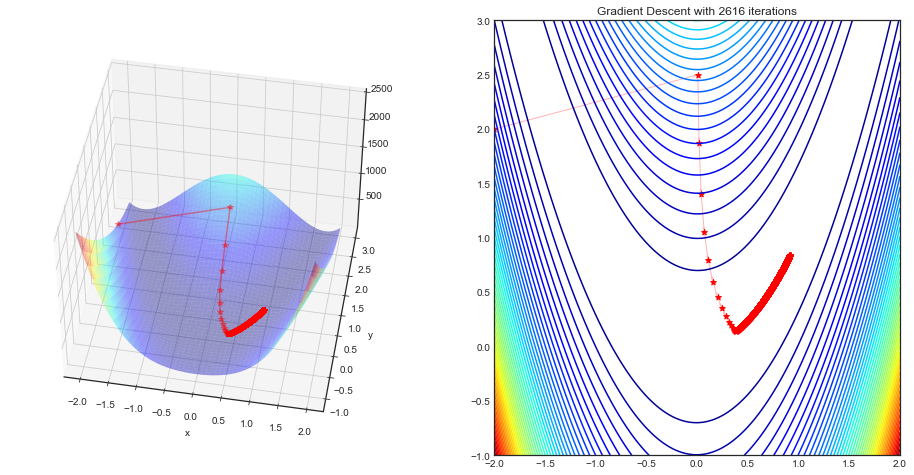

In [10]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


plt.show()

In [11]:
def f(x,y):
    return .01*x**2 + .1*y**2

def Grad_f(x,y):
    g1 = 2*.01*x
    g2 = 2*.1*y
    return np.array([g1,g2]) 

root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_f,-2,-2,1)

[-4.85736291e-03 -2.64147266e-29]


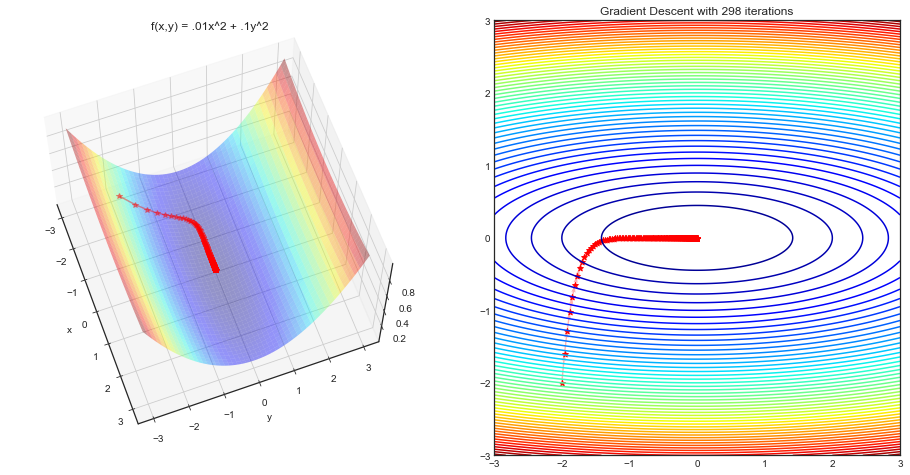

In [12]:
x = np.linspace(-3,3,250)
y = np.linspace(-3,3,250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)
ax.set_title('f(x,y) = .01x^2 + .1y^2')


ax.view_init(65, 340)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))

plt.show()